
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [ ]:
# Yor code here to complete the Linear Interpolation Function
x = [1, 4]
y = [3, 12]
def linear_interpolation(x_points, y_points, x):
    return x + (y_points[1] - y_points[0]) / (x_points[1] - x_points[0])

print(linear_interpolation(x, y, 2.5))



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [2]:
# Your code here
import numpy as np

def fowdiff(f, x, h):
    return (f(x + h) - f(x)) / (h)

def backdiff(f, x, h):
    return (f(x) - f(x - h)) / (h)

def centdiff(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

print(fowdiff(np.sin, np.pi/4, 0.01))
print(fowdiff(np.sin, np.pi/4, 0.01))
print(backdiff(np.sin, np.pi/4, 0.01))

0.7035594916891985
0.7035594916891985
0.7106305005757152



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

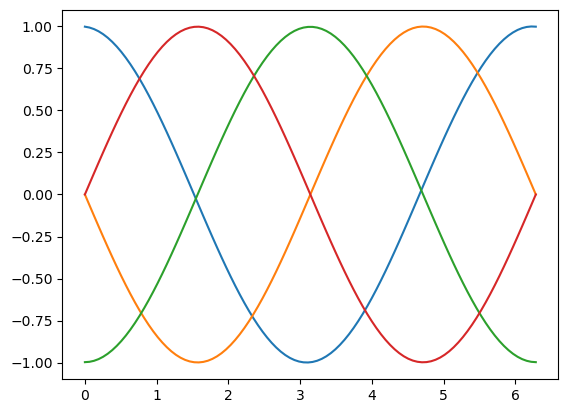

In [11]:
# Your code here
import numpy as np
def firstder(f, x, h):
    return (f(x + h) - f(x)) / h
def secondder(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / (h**2)
def thirdder(f, x, h):
    return (f(x + 2*h) - 2*f(x + h) + 2*f(x - h) - f(x - 2*h)) / (2 * h**3)
def fourthder(f, x, h):
    return (f(x + 2*h) - 4*f(x + h) + 6*f(x) - 4*f(x - h) + f(x - 2*h)) / h**4

import matplotlib.pyplot as plt
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
h = 0.1
plt.plot(x, firstder(np.sin, x, h), label='First Derivative')
plt.plot(x, secondder(np.sin, x, h), label='Second Derivative')
plt.plot(x, thirdder(np.sin, x, h), label='Third Derivative')
plt.plot(x, fourthder(np.sin, x, h), label='Fourth Derivative')

### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

In [ ]:
#Credit to Generative AI
import numpy as np
import matplotlib.pyplot as plt

# Constants
w = 5      # kN/m
L = 10     # m
E = 200e9  # Young's modulus in Pa
I = 1e-6   # Moment of inertia in m^4

def y(x):
    return (w / (24 * E * I)) * x * (L**3 - 2 * L * x**2 + x**3)

x_points = np.linspace(0, L, 1000)
y_points = y(x_points) 

def numerical_second_derivative(x, y):
    h = x[1] - x[0]
    n = len(y)
    d2y_dx2 = np.zeros(n)
    
    for i in range(1, n-1):
        d2y_dx2[i] = (y[i+1] - 2*y[i] + y[i-1]) / (h**2)
    
    d2y_dx2[0] = (2*y[0] - 5*y[1] + 4*y[2] - y[3]) / (h**2)
    d2y_dx2[-1] = (2*y[-1] - 5*y[-2] + 4*y[-3] - y[-4]) / (h**2)
    
    return d2y_dx2

d2y_dx2 = numerical_second_derivative(x_points, y_points)
M_points = -E * I * d2y_dx2

def numerical_first_derivative(x, y):
    h = x[1] - x[0] 
    n = len(y)
    dy_dx = np.zeros(n)
    
    for i in range(1, n-1):
        dy_dx[i] = (y[i+1] - y[i-1]) / (2 * h)
    dy_dx[0] = (-3*y[0] + 4*y[1] - y[2]) / (2 * h)
    dy_dx[-1] = (3*y[-1] - 4*y[-2] + y[-3]) / (2 * h)
    
    return dy_dx

dM_dx = numerical_first_derivative(x_points, M_points)
V_points = dM_dx  # Shear force

def exact_moment(x):
    return (w * x * (L - x)) / 2

def exact_shear(x):
    return w * (L/2 - x)

M_exact = exact_moment(x_points)
V_exact = exact_shear(x_points)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(x_points, y_points * 1000, 'b-', linewidth=2, label='Deflection')
plt.xlabel('Position along beam (m)')
plt.ylabel('Deflection (mm)')
plt.title('Beam Deflection')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_points, M_points / 1000, 'r-', linewidth=2, label='Numerical M(x)')
plt.plot(x_points, M_exact / 1000, 'k--', linewidth=1, label='Exact M(x)')
plt.xlabel('Position along beam (m)')
plt.ylabel('Bending Moment (kN·m)')
plt.title('Bending Moment Distribution')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_points, V_points / 1000, 'g-', linewidth=2, label='Numerical V(x)')
plt.plot(x_points, V_exact / 1000, 'k--', linewidth=1, label='Exact V(x)')
plt.xlabel('Position along beam (m)')
plt.ylabel('Shear Force (kN)')
plt.title('Shear Force Distribution')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_points, y_points * 1000, 'b-', label='Deflection (mm)')
plt.plot(x_points, M_points / 1000, 'r-', label='Moment (kN·m)')
plt.plot(x_points, V_points / 1000, 'g-', label='Shear (kN)')
plt.xlabel('Position along beam (m)')
plt.ylabel('Various Units')
plt.title('Beam Analysis Summary')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Beam Analysis Results:")
print(f"Maximum deflection: {np.max(y_points) * 1000:.3f} mm")
print(f"Maximum bending moment: {np.max(np.abs(M_points)) / 1000:.3f} kN·m")
print(f"Maximum shear force: {np.max(np.abs(V_points)) / 1000:.3f} kN")
print(f"\nAt mid-span (x = {L/2} m):")
print(f"Deflection: {y(L/2) * 1000:.3f} mm")
print(f"Bending moment: {M_points[len(M_points)//2] / 1000:.3f} kN·m")
print(f"Shear force: {V_points[len(V_points)//2] / 1000:.3f} kN")

M_error = np.max(np.abs(M_points - M_exact)) / np.max(np.abs(M_exact)) * 100
V_error = np.max(np.abs(V_points - V_exact)) / np.max(np.abs(V_exact)) * 100

print(f"\nNumerical Method Errors:")
print(f"Bending moment maximum error: {M_error:.2f}%")
print(f"Shear force maximum error: {V_error:.2f}%")


## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

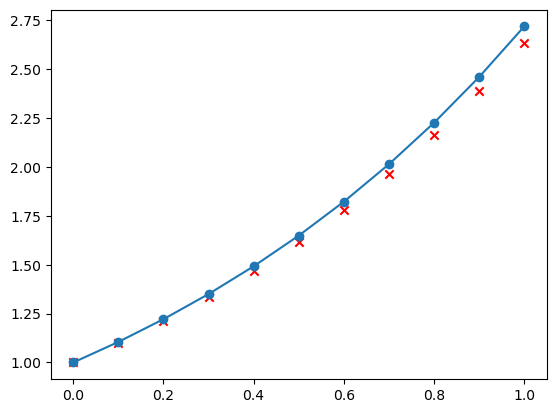

In [22]:
# Your code here
import numpy as np
import matplotlib.pyplot

h = 0.1
num_steps = 10

def f(x,y):
    return np.exp(x)

x0 = 0
y0 = 1
xs = [x0]
ys = [y0]

for i in range(num_steps):
    y0 += h * f(x0, y0)
    x0 += h
    xs.append(x0)
    ys.append(y0)

plt.scatter(xs, ys, color='red', label='Euler Method', marker='x')
plt.plot(xs, np.exp(xs), marker='o')


    


#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

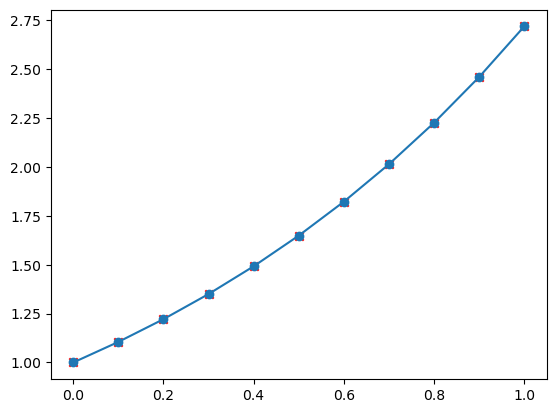

In [26]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
h = 0.1
num_steps = 10

def f(x,y):
    return np.exp(x)

x0 = 0
y0 = 1
xs = [x0]
ys = [y0]

for i in range(num_steps):
    k1 = h * f(x0, y0)
    k2 = h * f(x0 + h/2, y0 + k1/2)
    k3 = h * f(x0 + h/2, y0 + k2)
    k4 = h * f(x0 + h, y0 + k3)
    y0 += (k1 + 2*k2 + 2*k3 + k4) / 6
    x0 += h
    xs.append(x0)
    ys.append(y0)

plt.scatter(xs, ys, color='red', label='Euler Method', marker='x')
plt.plot(xs, np.exp(xs), marker='o')
